In [1]:
# https://towardsdatascience.com/apply-function-to-pandas-dataframe-rows-76df74165ee4

In [2]:
# https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#skfuzzy.gaussmf

In [3]:
! pip install plotly_express
# Para usar as funções de visualização
# Não há necessidade de instalar novamente, uma vez feita a instalação. A importação é feita cada vez para uso.

In [4]:
import random
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import chi2
%matplotlib inline
import pandas_profiling

In [5]:
import plotly_express as px

In [6]:
qws = pd.read_csv("qwsA.csv")
# carregamento do dataset

In [7]:
qws = pd.DataFrame(qws)                  

In [8]:
qws.head(3)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...


In [9]:
qws.tail(2)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
362,6962.85,28,0.5,21,30.0,78,69,6915.08,5,32,4,SKOSThesaurusService,http://nbii-thesaurus.ornl.gov/ws/services/SKO...
363,1680.16,16,2.0,7,12.5,89,72,1667.22,11,30,4,sugarsoap,http://axonsolutions.com.au/sugarcrm/SugarSuit...


In [10]:
qws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 13 columns):
Response Time     364 non-null float64
Availability      364 non-null int64
Throughput        364 non-null float64
Succesability     364 non-null int64
Reliability       364 non-null float64
Compliance        364 non-null int64
Best Practices    364 non-null int64
Latency           364 non-null float64
Documentation     364 non-null int64
WsRF              364 non-null int64
Class             364 non-null int64
Service Name      364 non-null object
WSDL Address      364 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 37.1+ KB


In [11]:
round(qws.describe(),2)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class
count,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00
mean,840.28,84.75,7.28,64.44,61.32,83.68,80.69,763.48,47.53,66.65,2.78
std,2764.32,20.45,6.46,21.17,21.20,8.77,6.69,2755.56,36.40,11.51,0.98
min,45.00,14.00,0.10,7.00,5.90,67.00,58.00,31.50,1.00,30.00,1.00
25%,136.78,74.75,2.18,50.00,49.90,78.00,77.00,121.88,9.00,59.00,2.00
50%,236.65,96.00,5.60,67.00,64.20,78.00,83.00,180.93,39.00,67.50,3.00
75%,480.06,100.00,10.62,80.25,78.00,89.00,84.00,409.27,89.00,74.25,4.00
max,30781.00,100.00,29.50,99.00,97.70,100.00,95.00,30781.00,97.00,100.00,4.00


In [12]:
rt = np.array(qws["Response Time"]).reshape(-1,1)

In [13]:
av = np.array(qws["Availability"]).reshape(-1,1)

In [14]:
thr = np.array(qws["Throughput"]).reshape(-1,1)

In [15]:
sc = np.array(qws["Succesability"]).reshape(-1,1)

In [16]:
rb = np.array(qws["Reliability"]).reshape(-1,1)

In [17]:
cp = np.array(qws["Compliance"]).reshape(-1,1)

In [18]:
bp = np.array(qws["Best Practices"]).reshape(-1,1)

In [19]:
lt = np.array(qws["Latency"]).reshape(-1,1)

In [20]:
dc = np.array(qws["Documentation"]).reshape(-1,1)

In [21]:
ws = np.array(qws["WsRF"]).reshape(-1,1)

## Fuzzy Logic

In [22]:
!pip install scikit-fuzzy

C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is cur

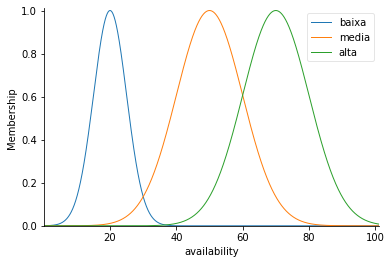

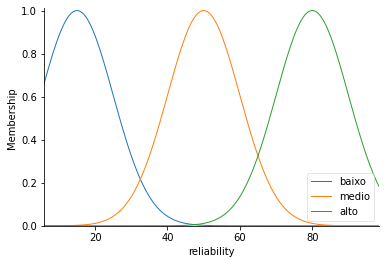

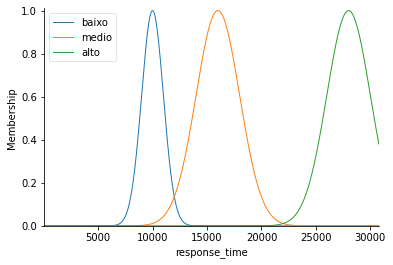

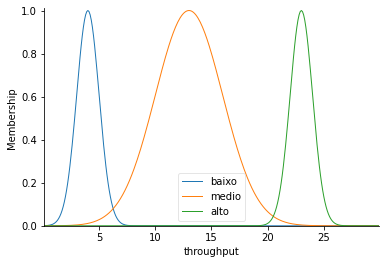

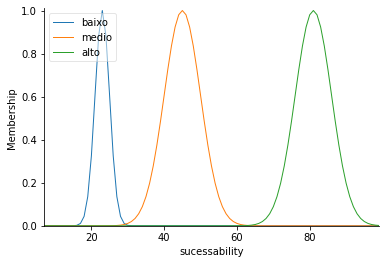

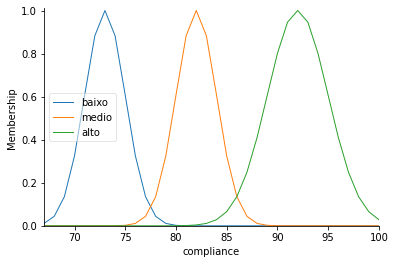

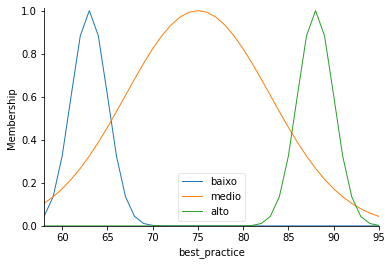

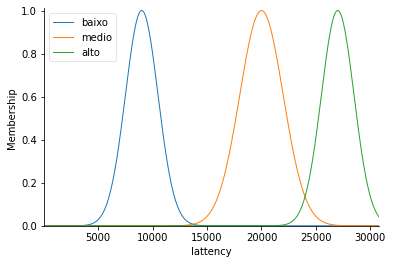

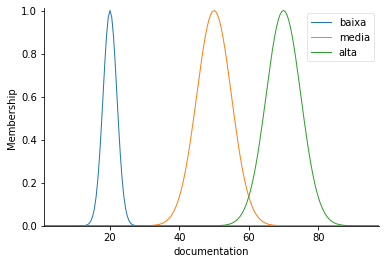

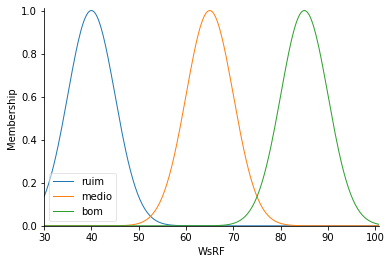

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96, 1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782, .5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98, .5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.gaussmf(Availability.universe,20,5)
Availability['media'] = fuzz.gaussmf(Availability.universe,50,10)
Availability['alta'] = fuzz.gaussmf(Availability.universe,70,10)

# Reliability
Reliability['baixo'] = fuzz.gaussmf(Reliability.universe,15,10)
Reliability['medio'] = fuzz.gaussmf(Reliability.universe,50,10)
Reliability['alto'] = fuzz.gaussmf(Reliability.universe,80,10)

Response_Time['baixo'] = fuzz.gaussmf(Response_Time.universe,10000,1000)
Response_Time['medio'] = fuzz.gaussmf(Response_Time.universe,16000,2000)
Response_Time['alto'] = fuzz.gaussmf(Response_Time.universe, 28000,2000)

Throughput['baixo'] = fuzz.gaussmf(Throughput.universe,4,1)
Throughput['medio'] = fuzz.gaussmf(Throughput.universe,13,3)
Throughput['alto'] = fuzz.gaussmf(Throughput.universe, 23,1)

Sucessability['baixo'] = fuzz.gaussmf(Sucessability.universe,23,2)
Sucessability['medio'] = fuzz.gaussmf(Sucessability.universe,45,5)
Sucessability['alto'] = fuzz.gaussmf(Sucessability.universe,81,5)

Compliance['baixo'] = fuzz.gaussmf(Compliance.universe,73,2)
Compliance['medio'] = fuzz.gaussmf(Compliance.universe,82,2)
Compliance['alto'] = fuzz.gaussmf(Compliance.universe,92,3)

Best_Practice['baixo'] = fuzz.gaussmf(Best_Practice.universe,63,2)
Best_Practice['medio'] = fuzz.gaussmf(Best_Practice.universe,75,8)
Best_Practice['alto'] = fuzz.gaussmf(Best_Practice.universe,88,2)

Lattency['baixo'] = fuzz.gaussmf(Lattency.universe,9000,1500)
Lattency['medio'] = fuzz.gaussmf(Lattency.universe,20000,2000)
Lattency['alto'] = fuzz.gaussmf(Lattency.universe,27000,1500)

Documentation['baixa'] = fuzz.gaussmf(Documentation.universe,20,2)
Documentation['media'] = fuzz.gaussmf(Documentation.universe,50,5)
Documentation['alta'] = fuzz.gaussmf(Documentation.universe,70,5)

# WsRF
WsRF['ruim'] = fuzz.gaussmf(WsRF.universe,40,5)
WsRF['medio'] = fuzz.gaussmf(WsRF.universe, 65,5)
WsRF['bom'] = fuzz.gaussmf(WsRF.universe, 85,5)


# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']& Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])

# regra 4 - 
#regra4 = ctrl.Rule(Availability['media'] | Reliability['baixo'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['medio'] &
#Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['ruim'])

# regra 5 - 
#regra5 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['medio'] &
#Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['media'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

Availability.view()
Reliability.view()
Response_Time.view()
Throughput.view()
Sucessability.view()
Compliance.view()
Best_Practice.view()
Lattency.view()
Documentation.view()
WsRF.view()


84.68
-0.153


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



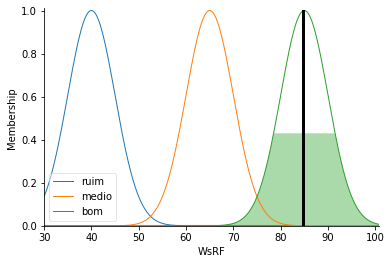

In [26]:
engine.input['availability'] = 83
engine.input['reliability'] = 97.4
engine.input['response_time'] = 45
engine.input['throughput'] = 83
engine.input['sucessability'] = 50
engine.input['compliance'] = 89
engine.input['best_practice'] = 91
engine.input['lattency'] = 43
engine.input['documentation'] = 58

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 100
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

In [24]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[84.68033504]
[15.31966496]
[15.31966496]
[234.69213464]
1
[84.50088153]
[9.13883707]
[12.22925102]
[153.46357473]
2
[84.50088153]
[6.11013164]
[10.18954456]
[112.38915115]
3
[84.50088153]
[6.11013164]
[9.16969133]
[91.85193936]
4
[84.50088153]
[6.11013164]
[8.55777939]
[79.52961228]
5
[84.50088153]
[6.11013164]
[8.1498381]
[71.31472757]
6
[84.50088153]
[5.0551893]
[7.70774541]
[64.01863321]
7
[84.50088153]
[3.97627099]
[7.24131111]
[57.54678282]
8
[84.50088153]
[3.97627099]
[6.87852887]
[52.5131214]
9
[84.50088153]
[2.87254997]
[6.47793098]
[47.88636858]
10
[84.50088153]
[2.87254997]
[6.15016907]
[44.10084354]
11
[84.50088153]
[2.87254997]
[5.87703415]
[40.94623934]
12
[84.50088153]
[2.87254997]
[5.64591998]
[38.27695886]
13
[84.50088153]
[1.74316102]
[5.36715148]
[35.70341581]
14
[84.50088153]
[1.74316102]
[5.12555212]
[33.47301184]
15
[84.50088153]
[1.74316102]
[4.91415267]
[31.52140836]
16
[84.50088153]
[0.5871982]
[4.65962594]
[29.68186194]
17
[84.50088153]
[0.5871982]
[4.433379

146
[84.50088153]
[-20.71554504]
[-9.0957199]
[79.92986432]
147
[84.81613363]
[-21.16590519]
[-9.1772752]
[80.87302615]
148
[84.50088153]
[-20.71554504]
[-9.25471325]
[81.74149957]
149
[84.50088153]
[-20.71554504]
[-9.3311188]
[82.59839334]
150
[84.50088153]
[-20.71554504]
[-9.40651235]
[83.44393752]
151
[84.50088153]
[-20.71554504]
[-9.48091388]
[84.27835612]
152
[74.98574546]
[-7.12249352]
[-9.46549937]
[83.88998555]
153
[84.81613363]
[-21.16590519]
[-9.54147603]
[84.77068574]
154
[84.50088153]
[-20.71554504]
[-9.6135668]
[85.58039464]
155
[84.50088153]
[-20.71554504]
[-9.68473333]
[86.37972266]
156
[84.68033504]
[-20.97190719]
[-9.75662615]
[87.20222275]
157
[84.50088153]
[-20.71554504]
[-9.8259864]
[87.98116795]
158
[84.50088153]
[-20.71554504]
[-9.89447419]
[88.7503151]
159
[84.81613363]
[-22.9219328]
[-9.97589581]
[89.75906365]
160
[84.88498461]
[-23.02171682]
[-10.05692575]
[90.76883801]
161
[84.50088153]
[-22.46504569]
[-10.13351908]
[91.69172993]
162
[84.50088153]
[-22.4650456

293
[84.81613363]
[-51.45738148]
[-19.30621206]
[227.16068524]
294
[84.87480646]
[-51.56215439]
[-19.41555424]
[229.21693529]
295
[78.07762507]
[-39.42433049]
[-19.48315146]
[230.0892481]
296
[84.76159335]
[-51.35998812]
[-19.59048087]
[232.09982051]
297
[79.89078382]
[-42.66211396]
[-19.66790246]
[233.23629611]
298
[84.86164969]
[-51.53866017]
[-19.77449362]
[235.24217748]
299
[84.61689334]
[-51.10159526]
[-19.8789173]
[237.18779217]
300
[84.50088153]
[-50.8944313]
[-19.98195887]
[239.09846478]
301
[78.07762507]
[-39.42433049]
[-20.04633759]
[239.92072658]
302
[84.81613363]
[-54.21115206]
[-20.15909275]
[242.06290842]
303
[70.07528667]
[-27.40961212]
[-20.18294314]
[242.01422868]
304
[72.50602387]
[-31.82913431]
[-20.22112737]
[242.22552915]
305
[76.84736922]
[-39.72248949]
[-20.28485732]
[242.99377102]
306
[84.73700446]
[-54.06728083]
[-20.39489778]
[245.08268198]
307
[72.50602387]
[-31.82913431]
[-20.43202193]
[245.28196181]
308
[84.76159335]
[-54.11198791]
[-20.54101858]
[247.35468

IndexError: index 364 is out of bounds for axis 0 with size 364

## 3_Regras_normais_5_parâmetros_importance_gaussiana

In [25]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Documentation = ctrl.Antecedent(np.arange(1,98, .5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.gaussmf(Availability.universe,20,5)
Availability['media'] = fuzz.gaussmf(Availability.universe,50,10)
Availability['alta'] = fuzz.gaussmf(Availability.universe,70,10)

# Reliability
Reliability['baixo'] = fuzz.gaussmf(Reliability.universe,15,10)
Reliability['medio'] = fuzz.gaussmf(Reliability.universe,50,10)
Reliability['alto'] = fuzz.gaussmf(Reliability.universe,80,10)

Throughput['baixo'] = fuzz.gaussmf(Throughput.universe,4,1)
Throughput['medio'] = fuzz.gaussmf(Throughput.universe,13,3)
Throughput['alto'] = fuzz.gaussmf(Throughput.universe, 23,1)

Sucessability['baixo'] = fuzz.gaussmf(Sucessability.universe,23,2)
Sucessability['medio'] = fuzz.gaussmf(Sucessability.universe,45,5)
Sucessability['alto'] = fuzz.gaussmf(Sucessability.universe,81,5)

Documentation['baixa'] = fuzz.gaussmf(Documentation.universe,20,2)
Documentation['media'] = fuzz.gaussmf(Documentation.universe,50,5)
Documentation['alta'] = fuzz.gaussmf(Documentation.universe,70,5)

# WsRF
WsRF['ruim'] = fuzz.gaussmf(WsRF.universe,40,5)
WsRF['medio'] = fuzz.gaussmf(WsRF.universe, 65,5)
WsRF['bom'] = fuzz.gaussmf(WsRF.universe, 85,5)


# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa'] & Reliability['baixo'] & Throughput['baixo'] & 
Sucessability['baixo'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] & Reliability['medio'] & Throughput['medio'] & 
Sucessability['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] & Reliability['alto'] & Throughput['alto'] & 
Sucessability['alto'] & Documentation['alta'], WsRF['bom'])

# regra 4 - 
# regra4 = ctrl.Rule(Availability['alta'] & Reliability['alto'] | Response_Time['medio'] | Throughput['medio'] | Sucessability['medio'] |
# Compliance['medio'] | Best_Practice['medio'] & Lattency['alto'] | Documentation['media'], WsRF['bom'])

# regra 5 - 
# regra5 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] | Response_Time['baixo'] | Throughput['baixo'] & Sucessability['medio'] &
# Compliance['medio'] & Best_Practice['medio'] & Lattency['baixo'] & Documentation['media'], WsRF['ruim'])

# regra 6 - 
# regra6 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Response_Time['medio'] & Throughput['baixo'] | Sucessability['medio'] &
# Compliance['medio'] & Best_Practice['medio'] & Lattency['baixo'] & Documentation['baixa'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [27]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[65.00091816]
[34.99908184]
[34.99908184]
[1224.93572974]
1
[70.3368086]
[24.36902301]
[29.68405243]
[869.27798705]
2
[84.50828846]
[6.10190171]
[21.82333552]
[589.57162325]
3
[65.375]
[27.36111111]
[23.20777942]
[593.77637369]
4
[80.3603819]
[10.71068678]
[20.70836089]
[493.60554637]
5
[83.20158374]
[7.55379585]
[18.51593338]
[419.04103259]
6
[65.375]
[26.54494382]
[19.66293487]
[438.91240293]
7
[76.97209113]
[12.53171462]
[18.77153234]
[399.25019931]
8
[75.99560677]
[13.64135594]
[18.20151274]
[370.90078348]
9
[65.375]
[24.85632184]
[18.86699365]
[380.57476763]
10
[74.77136785]
[14.05589903]
[18.42962141]
[359.57155642]
11
[76.23995297]
[12.36787015]
[17.92447547]
[339.25547772]
12
[65.375]
[24.85632184]
[18.45769443]
[349.13125828]
13
[8.69671917]
[89.88753584]
[23.55982596]
[751.0359703]
14
[65.00309989]
[24.41500013]
[23.61683757]
[730.35822657]
15
[65.375]
[23.98255814]
[23.6396951]
[711.29775148]
16
[0.49977107]
[99.41203403]
[28.09689151]
[1089.47368897]
17
[65.375]
[23.08823

210
[8.69671917]
[86.62043204]
[28.447527]
[1033.34021941]
211
[65.00000001]
[-9.82494769e-09]
[28.31334055]
[1028.46597309]
212
[65.375]
[-0.57692308]
[28.17770551]
[1023.63815455]
213
[0.02909892]
[99.95523243]
[28.51311451]
[1038.58011639]
214
[1.35384115]
[97.8846232]
[28.83577269]
[1052.00319128]
215
[65.375]
[-2.1484375]
[28.69232728]
[1047.14155903]
216
[8.69671917]
[86.41137629]
[28.95831368]
[1056.41027475]
217
[65.375]
[-2.1484375]
[28.81562216]
[1051.57302865]
218
[65.01613378]
[-1.58770904]
[28.67679416]
[1046.77604006]
219
[65.375]
[-2.1484375]
[28.53667947]
[1042.0265609]
220
[65.375]
[-2.1484375]
[28.39783279]
[1037.32006346]
221
[65.375]
[-2.1484375]
[28.26023698]
[1032.65596689]
222
[65.00000195]
[-1.56250305]
[28.12650272]
[1028.02970696]
223
[65.375]
[-2.1484375]
[27.99134673]
[1023.44872892]
224
[1.35384115]
[97.8846232]
[28.30198352]
[1036.34247332]
225
[65.00000195]
[-1.56250305]
[28.16983977]
[1031.76131195]
226
[65.00000522]
[-1.56250816]
[28.03886027]
[1027.220

IndexError: index 364 is out of bounds for axis 0 with size 364

## 5 Regras_Gaussiana

In [29]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96, 1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782, .5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98, .5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.gaussmf(Availability.universe,20,5)
Availability['media'] = fuzz.gaussmf(Availability.universe,50,10)
Availability['alta'] = fuzz.gaussmf(Availability.universe,70,10)

# Reliability
Reliability['baixo'] = fuzz.gaussmf(Reliability.universe,15,10)
Reliability['medio'] = fuzz.gaussmf(Reliability.universe,50,10)
Reliability['alto'] = fuzz.gaussmf(Reliability.universe,80,10)

Response_Time['baixo'] = fuzz.gaussmf(Response_Time.universe,10000,1000)
Response_Time['medio'] = fuzz.gaussmf(Response_Time.universe,16000,2000)
Response_Time['alto'] = fuzz.gaussmf(Response_Time.universe, 28000,2000)

Throughput['baixo'] = fuzz.gaussmf(Throughput.universe,4,1)
Throughput['medio'] = fuzz.gaussmf(Throughput.universe,13,3)
Throughput['alto'] = fuzz.gaussmf(Throughput.universe, 23,1)

Sucessability['baixo'] = fuzz.gaussmf(Sucessability.universe,23,2)
Sucessability['medio'] = fuzz.gaussmf(Sucessability.universe,45,5)
Sucessability['alto'] = fuzz.gaussmf(Sucessability.universe,81,5)

Compliance['baixo'] = fuzz.gaussmf(Compliance.universe,73,2)
Compliance['medio'] = fuzz.gaussmf(Compliance.universe,82,2)
Compliance['alto'] = fuzz.gaussmf(Compliance.universe,92,3)

Best_Practice['baixo'] = fuzz.gaussmf(Best_Practice.universe,63,2)
Best_Practice['medio'] = fuzz.gaussmf(Best_Practice.universe,75,8)
Best_Practice['alto'] = fuzz.gaussmf(Best_Practice.universe,88,2)

Lattency['baixo'] = fuzz.gaussmf(Lattency.universe,9000,1500)
Lattency['medio'] = fuzz.gaussmf(Lattency.universe,20000,2000)
Lattency['alto'] = fuzz.gaussmf(Lattency.universe,27000,1500)

Documentation['baixa'] = fuzz.gaussmf(Documentation.universe,20,2)
Documentation['media'] = fuzz.gaussmf(Documentation.universe,50,5)
Documentation['alta'] = fuzz.gaussmf(Documentation.universe,70,5)

# WsRF
WsRF['ruim'] = fuzz.gaussmf(WsRF.universe,40,5)
WsRF['medio'] = fuzz.gaussmf(WsRF.universe, 65,5)
WsRF['bom'] = fuzz.gaussmf(WsRF.universe, 85,5)


In [30]:
# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']& Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])

# regra 4 - 
regra4 = ctrl.Rule(Availability['media'] | Reliability['baixo'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['ruim'])

# regra 5 - 
regra5 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['media'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [31]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[84.26360657]
[15.73639343]
[15.73639343]
[247.63407825]
1
[84.49617431]
[9.14389859]
[12.44014601]
[159.97456483]
2
[84.49617431]
[6.11536188]
[10.33188464]
[116.74707564]
3
[84.49617431]
[6.11536188]
[9.27775395]
[95.13333105]
4
[84.49617431]
[6.11536188]
[8.64527553]
[82.16508429]
5
[84.49617431]
[6.11536188]
[8.22362326]
[73.51958645]
6
[84.49617431]
[5.06047831]
[7.77174541]
[65.91456637]
7
[84.49617431]
[3.98162011]
[7.29797975]
[59.20984488]
8
[84.49617431]
[3.98162011]
[6.92949534]
[53.99506151]
9
[84.49617431]
[2.87796057]
[6.52434186]
[49.22246966]
10
[84.49617431]
[2.87796057]
[6.19285265]
[45.3176218]
11
[84.49617431]
[2.87796057]
[5.91661165]
[42.0635819]
12
[84.49617431]
[2.87796057]
[5.68286926]
[39.31016353]
13
[84.49617431]
[1.74863453]
[5.40185249]
[36.66382983]
14
[84.49617431]
[1.74863453]
[5.15830463]
[34.37034063]
15
[84.49617431]
[1.74863453]
[4.94520024]
[32.36353757]
16
[84.49617431]
[0.59273611]
[4.68917294]
[30.47473185]
17
[84.49617431]
[0.59273611]
[4.461

[-20.70882044]
[-7.72736261]
[82.03490164]
143
[84.49617431]
[-20.70882044]
[-7.81751162]
[82.92451391]
144
[84.49617431]
[-20.70882044]
[-7.9064172]
[83.80185568]
145
[84.49617431]
[-20.70882044]
[-7.99410489]
[84.66717906]
146
[84.49617431]
[-20.70882044]
[-8.08059955]
[85.52072933]
147
[84.62362056]
[-20.89088651]
[-8.16715555]
[86.38782088]
148
[84.49617431]
[-20.70882044]
[-8.25132779]
[87.21836617]
149
[84.49617431]
[-20.70882044]
[-8.33437775]
[88.03783753]
150
[84.49617431]
[-20.70882044]
[-8.4163277]
[88.84645496]
151
[84.49617431]
[-20.70882044]
[-8.49719936]
[89.64443269]
152
[63.49404317]
[9.29422404]
[-8.38091555]
[89.33517152]
153
[84.62362056]
[-20.89088651]
[-8.46214912]
[90.14371117]
154
[84.49617431]
[-20.70882044]
[-8.54115991]
[90.91787478]
155
[84.49617431]
[-20.70882044]
[-8.61915773]
[91.6821132]
156
[84.26360657]
[-20.37658081]
[-8.69404578]
[92.39401358]
157
[84.49617431]
[-20.70882044]
[-8.77008865]
[93.13923545]
158
[84.49617431]
[-20.70882044]
[-8.84517502]


290
[84.26360657]
[-47.83088872]
[-16.85381926]
[211.04257938]
291
[82.6670165]
[-45.02985351]
[-16.95031253]
[212.5759806]
292
[43.02319003]
[24.52071925]
[-16.80877317]
[212.51719301]
293
[84.62362056]
[-51.11360814]
[-16.92545628]
[214.58111975]
294
[84.78675202]
[-51.40491432]
[-17.0423358]
[216.66280101]
295
[68.53871184]
[-22.39055686]
[-17.06040411]
[216.46197836]
296
[84.7510196]
[-51.34110643]
[-17.17582735]
[218.51638627]
297
[72.10059616]
[-28.75106457]
[-17.21467043]
[218.65300644]
298
[84.7472705]
[-51.3344116]
[-17.32878328]
[220.68562368]
299
[84.61072295]
[-51.0905767]
[-17.44132259]
[222.67858316]
300
[84.49617431]
[-50.88602555]
[-17.55243456]
[224.63656777]
301
[68.53871184]
[-22.39055686]
[-17.56845483]
[224.41333176]
302
[84.62362056]
[-53.86112828]
[-17.68823263]
[226.56892768]
303
[57.37313352]
[-4.31478822]
[-17.64424104]
[225.84216069]
304
[60.16500709]
[-9.39092198]
[-17.61718098]
[225.18916114]
305
[66.39340464]
[-20.71528117]
[-17.62730549]
[224.87746345]
30

IndexError: index 364 is out of bounds for axis 0 with size 364

## 5 Regras_gaussiana_5_param_especialistas

In [32]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Lattency = ctrl.Antecedent(np.arange(31.5,30782, .5), 'lattency')
# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.gaussmf(Availability.universe,20,5)
Availability['media'] = fuzz.gaussmf(Availability.universe,50,10)
Availability['alta'] = fuzz.gaussmf(Availability.universe,70,10)

# Reliability
Reliability['baixo'] = fuzz.gaussmf(Reliability.universe,15,10)
Reliability['medio'] = fuzz.gaussmf(Reliability.universe,50,10)
Reliability['alto'] = fuzz.gaussmf(Reliability.universe,80,10)

Response_Time['baixo'] = fuzz.gaussmf(Response_Time.universe,10000,1000)
Response_Time['medio'] = fuzz.gaussmf(Response_Time.universe,16000,2000)
Response_Time['alto'] = fuzz.gaussmf(Response_Time.universe, 28000,2000)

Throughput['baixo'] = fuzz.gaussmf(Throughput.universe,4,1)
Throughput['medio'] = fuzz.gaussmf(Throughput.universe,13,3)
Throughput['alto'] = fuzz.gaussmf(Throughput.universe, 23,1)

Lattency['baixo'] = fuzz.gaussmf(Lattency.universe,9000,1500)
Lattency['medio'] = fuzz.gaussmf(Lattency.universe,20000,2000)
Lattency['alto'] = fuzz.gaussmf(Lattency.universe,27000,1500)

# WsRF
WsRF['ruim'] = fuzz.gaussmf(WsRF.universe,40,5)
WsRF['medio'] = fuzz.gaussmf(WsRF.universe, 65,5)
WsRF['bom'] = fuzz.gaussmf(WsRF.universe, 85,5)


In [35]:
# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']& Reliability['baixo'] & Response_Time['alto'] & 
Throughput['baixo'] & Lattency['alto'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] & Reliability['medio'] & Response_Time['medio'] & 
Throughput['medio'] & Lattency['medio'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] & Reliability['alto'] & Response_Time['baixo'] & 
Throughput['alto'] & Lattency['baixo'], WsRF['bom'])

# regra 4 - 
regra4 = ctrl.Rule(Availability['media'] | Reliability['baixo'] & Response_Time['alto'] & 
Throughput['medio']  & Lattency['medio'], WsRF['ruim'])

# regra 5 - 
regra5 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Response_Time['alto'] & 
Throughput['medio'] & Lattency['alto'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [36]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['lattency'] = lt[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[43.98424539]
[56.01575461]
[56.01575461]
[3137.76476507]
1
[47.99670164]
[48.3906434]
[52.20319901]
[2581.53081437]
2
[47.99670164]
[46.67033152]
[50.35890984]
[2309.11290074]
3
[47.99670164]
[46.67033152]
[49.43676526]
[2172.90394393]
4
[47.99670164]
[46.67033152]
[48.88347851]
[2091.17856984]
5
[47.99670164]
[46.67033152]
[48.51462068]
[2036.69498711]
6
[47.99670164]
[46.07112176]
[48.16554941]
[1985.92005706]
7
[47.99670164]
[45.4582936]
[47.82714243]
[1937.71303493]
8
[47.99670164]
[45.4582936]
[47.563937]
[1900.21868439]
9
[47.99670164]
[44.83137743]
[47.29068105]
[1862.32254428]
10
[47.99670164]
[44.83137743]
[47.06710799]
[1831.31661146]
11
[47.99670164]
[44.83137743]
[46.88079711]
[1805.47833411]
12
[47.99670164]
[44.83137743]
[46.72314944]
[1783.61517636]
13
[47.99670164]
[44.18988182]
[46.54220176]
[1759.37485566]
14
[47.99670164]
[44.18988182]
[46.38538043]
[1738.36657772]
15
[47.99670164]
[44.18988182]
[46.24816176]
[1719.98433452]
16
[47.99670164]
[43.53329219]
[46.0884

[29.41661524]
[38.37501307]
[908.15647961]
170
[41.13194277]
[39.51184887]
[38.38166124]
[907.06721657]
171
[47.99670164]
[29.41661524]
[38.32953887]
[904.11991848]
172
[43.98424539]
[35.3172862]
[38.31212701]
[902.22764421]
173
[47.99670164]
[29.41661524]
[38.26100338]
[899.34203674]
174
[47.99670164]
[29.41661524]
[38.21046402]
[896.48940765]
175
[47.99670164]
[29.41661524]
[38.16049897]
[893.6691948]
176
[41.97355322]
[38.27418644]
[38.16114127]
[892.44719896]
177
[43.07693448]
[36.65156694]
[38.15266052]
[890.92310905]
178
[47.03791692]
[30.82659277]
[38.11173276]
[888.40068346]
179
[47.99670164]
[29.41661524]
[38.06342655]
[885.68807936]
180
[47.99670164]
[29.41661524]
[38.01565412]
[883.00544878]
181
[47.99670164]
[29.41661524]
[37.96840665]
[880.35229766]
182
[47.27699298]
[29.4373239]
[37.92178871]
[877.66729607]
183
[47.99670164]
[28.36313189]
[37.86983949]
[874.86000288]
184
[47.99670164]
[28.36313189]
[37.81845188]
[872.0830588]
185
[47.99670164]
[28.36313189]
[37.76761683]


340
[41.97355322]
[14.3396873]
[32.16367928]
[592.44874262]
341
[46.79929581]
[4.49123305]
[32.08276569]
[590.73059747]
342
[40.27851206]
[17.79895498]
[32.04112193]
[589.23011278]
343
[40.54103963]
[15.53950077]
[31.9931521]
[587.67896737]
344
[40.3277969]
[15.98375646]
[31.94674806]
[586.14616659]
345
[40.61160607]
[13.59232751]
[31.8937006]
[584.57005506]
346
[40.29193044]
[14.27248844]
[31.84291901]
[583.01509294]
347
[40.9513594]
[8.99697911]
[31.77726975]
[581.3868642]
348
[40.69974573]
[9.55612061]
[31.71359884]
[579.77398546]
349
[40.281185]
[8.45185227]
[31.64713671]
[578.15700146]
350
[40.30444023]
[8.39899948]
[31.5809027]
[576.54873981]
351
[40.29193044]
[8.42743083]
[31.51512579]
[574.94987913]
352
[40.281185]
[6.32282558]
[31.4437595]
[573.34206631]
353
[40.27653344]
[4.10349181]
[31.3665271]
[571.73084674]
354
[40.27712038]
[1.76312103]
[31.28313723]
[570.1218093]
355
[40.28552864]
[-0.71382159]
[31.19325813]
[568.52057255]
356
[40.40123518]
[-3.59291073]
[31.09581788]
[

IndexError: index 364 is out of bounds for axis 0 with size 364